# ACP

Est ce qu'une ACP peut nous aider à comparer les volatilités implicites et les volatilités issues du modèle ?

<strong>Résumé des résultats :</strong>
- Les données brutes probablement en définissant des zones de l'espace dans le plan factoriel des deux premières composantes principales.
- Ca a l'air moins évident pour les variations relatives (IV normales) et les variations absolues...

<strong>NB : </strong>Le script est rédigé en R.

In [1]:
rm(list=ls())

In [2]:
printAllGraph = function(tableau, componentImportance = TRUE, factorialPlan = TRUE, correlationCercle = TRUE){
    tableau$Date <- as.Date( tableau$Date, '%d/%m/%Y') #Remise au format américan YYYY-MM-DD

    #ACP
    acpVar = princomp(tableau[,2:10], cor = TRUE, scores = TRUE)
    if (componentImportance){
        print(summary(acpVar))
    }

    #Valeurs propres
    valpVar = acpVar$sdev^2 

    #Représentation dans le plan factoriel
    scoresVar = acpVar$scores
    if (factorialPlan){
        plot(scoresVar[,1],scoresVar[,2], type = "n")
        n = nrow(tableau)
        couleurs = c("black", "red", "blue", "green", "cyan", "purple", "yellow", "gray", "pink", "orange", "darkgreen", 
                     "darkviolet", "blueviolet", "magenta", "salmon4", "turquoise")
        for (i in 1:n){
            color = as.integer(format(tableau$Date[i], "%Y")) - 2000
            text(scoresVar[i,1],scoresVar[i,2],labels=color,cex=0.5,col=couleurs[color])
        }
    }

    #On peut afficher le matrice de passage vers la base des composantes principales
    loadingsVar = acpVar$loadings

    #Cercle des corrélations
    corr1 = loadingsVar[,1]*sqrt(valpVar[1])
    corr2 = loadingsVar[,2]*sqrt(valpVar[2])
    if (correlationCercle){
        plot(corr1, corr2, xlim=c(-1,1), ylim=c(-1,1), asp=1, type="n")
        text(corr1, corr2, labels=colnames(tableau[,2:10]), cex=0.5)
        symbols(0,0,circles=1, inches=FALSE, add=TRUE)
        abline(h=0,v=0)
        symbols(0,0,circles=1,inches=F,add=T)
    }
}

# Données brutes (Black)

On remarque plusieurs choses :
- Les deux premières composantes principales expliquent 98% du modèle.
- Chaque année forme un "tas" bien localisé dans le plan factoriel des deux premières composantes principales. Les données sont relativement bien tassées jusqu'à 2014, puis les données de 2015 et 2016 sortent de cette zone pour occuper les valeurs très négatives de la première composante principale avec en plus une grande dispersion selon la deuxième composante principale, ce que l'on avait pas pour les données jusuq'à 2014.
- Très forte corrélation entre les différents types de swaptions comme le montre le cercle de corrélations.
- E1T5 se trouve hors des autres swaptions sur le cercle de corrélation.

In [3]:
ATM = read.table("Databases/swaphist.csv", sep= ";", header=TRUE, stringsAsFactors=F)
ATM$Date <- as.Date( ATM$Date, '%d/%m/%Y') #Remise au format américan YYYY-MM-DD
#str(ATM)

In [4]:
acp = princomp(ATM[,2:10], cor = TRUE, scores = TRUE)
summary(acp)

valp = acp$sdev^2 
#plot(valp, type="b")

Importance of components:
                          Comp.1     Comp.2     Comp.3      Comp.4      Comp.5
Standard deviation     2.9373609 0.46531837 0.30280060 0.202847884 0.125056415
Proportion of Variance 0.9586766 0.02405791 0.01018758 0.004571918 0.001737679
Cumulative Proportion  0.9586766 0.98273447 0.99292205 0.997493967 0.999231646
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.0639010340 0.0390779961 2.795710e-02 2.287265e-02
Proportion of Variance 0.0004537047 0.0001696766 8.684441e-05 5.812867e-05
Cumulative Proportion  0.9996853503 0.9998550269 9.999419e-01 1.000000e+00

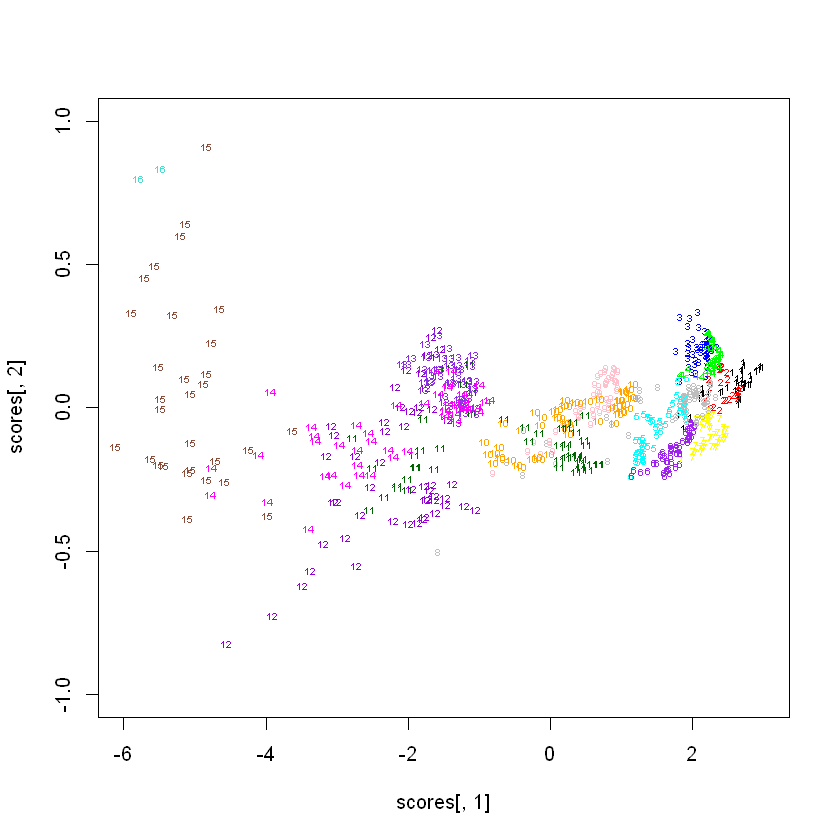

In [5]:
scores = acp$scores
#print(scores)
plot(scores[,1],scores[,2], type = "n", xlim = c(-6,3), ylim=c(-1,1))
n = nrow(ATM)
couleurs = c("black", "red", "blue", "green", "cyan", "purple", "yellow", "gray", "pink", "orange", "darkgreen", 
             "darkviolet", "blueviolet", "magenta", "salmon4", "turquoise")
for (i in 1:n){
    color = as.integer(format(ATM$Date[i], "%Y")) - 2000
    text(scores[i,1],scores[i,2],labels=color,cex=0.5,col=couleurs[color])
}

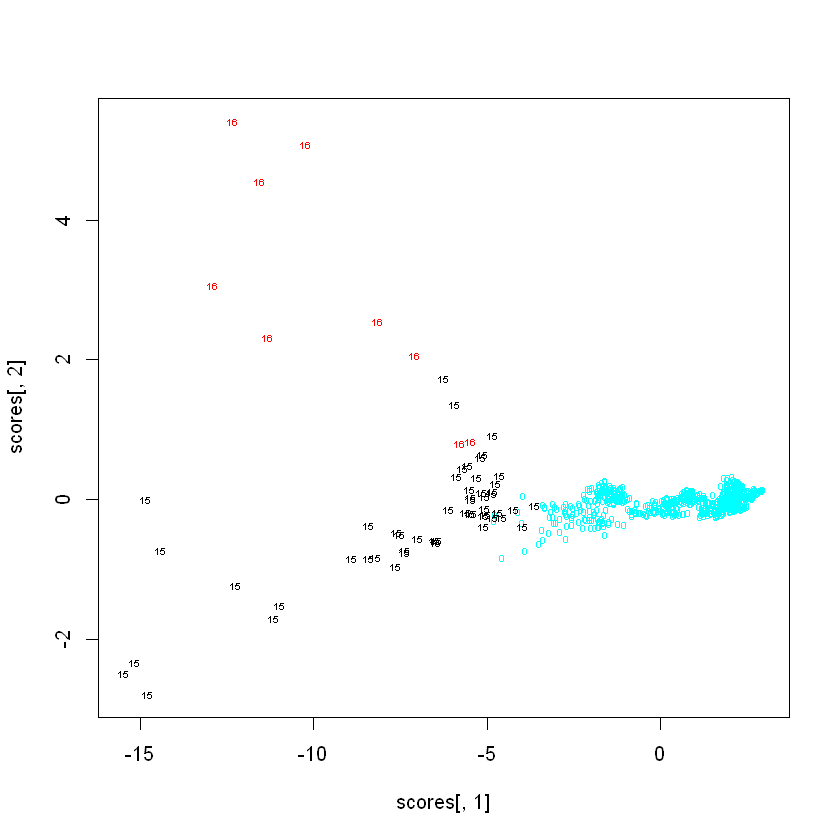

In [6]:
plot(scores[,1],scores[,2], type = "n")
n = nrow(ATM)
couleurs = c("black", "red", "blue", "green", "cyan", "purple", "yellow", "gray", "pink", "orange", "darkgreen", 
             "darkviolet", "blueviolet", "magenta", "salmon4", "turquoise")
for (i in 1:n){
    if (format(ATM$Date[i], "%Y") == (2015)){
        text(scores[i,1],scores[i,2],labels=15,cex=0.5,col=couleurs[1])
    }
    else if (format(ATM$Date[i], "%Y") == (2016)){
        text(scores[i,1],scores[i,2],labels=16,cex=0.5,col=couleurs[2])
    }
    else{
        text(scores[i,1],scores[i,2],labels=0,cex=0.5,col=couleurs[5])
    }
}

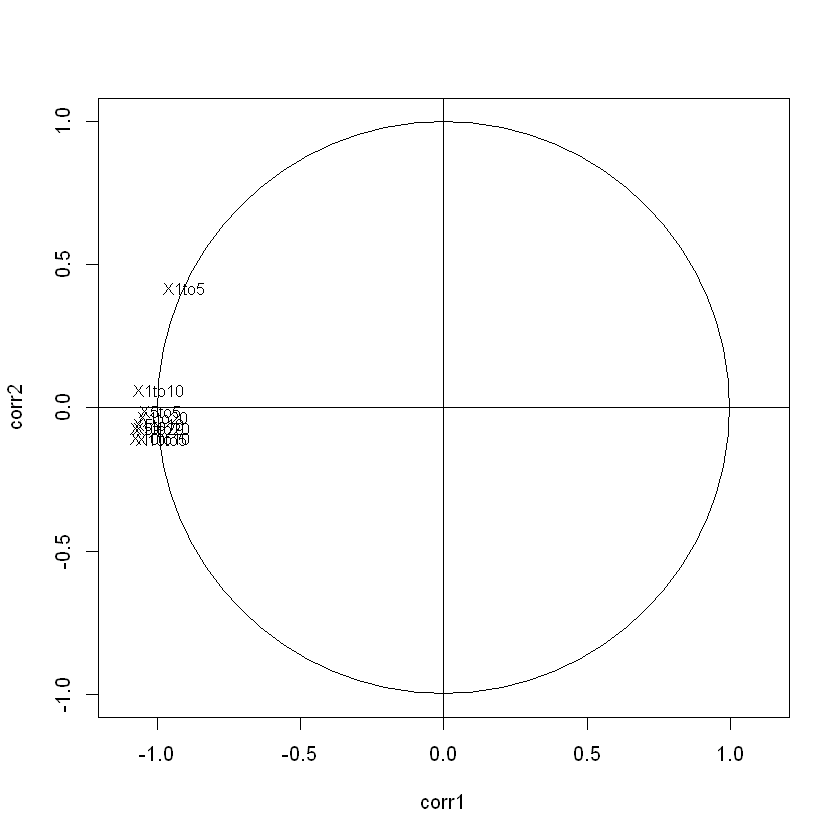

In [7]:
#On peut afficher le matrice de passage vers la base des composantes principales
loadings = acp$loadings
#print(loadings)

#Cercle des corrélations
corr1 = loadings[,1]*sqrt(valp[1])
corr2 = loadings[,2]*sqrt(valp[2])
plot(corr1, corr2, xlim=c(-1,1), ylim=c(-1,1), asp=1, type="n")
text(corr1, corr2, labels=colnames(ATM[,2:10]), cex=0.8)
symbols(0,0,circles=1, inches=FALSE, add=TRUE)
abline(h=0,v=0)
symbols(0,0,circles=1,inches=F,add=T)

# Variations absolues (Black)

- L'ACP semble moins robuste. Les deux premières composantes n'expliquent "que" 84% du modèle. Il faut monter à 5 composantes principales pour avoir autant de modèle expliqué comme précedemment.
- La dispersion évoqué précedemment dans le plan factoriel en fonction de l'année ne se retroube plus ici. 
- En revanche, on observe une concentration autour de 0 selon la deuxième composante principale et un tassement général des données.
- E1T5 ne se trouve pas sur le cercle de corrélation contraireemnt à tous les autres swaptions. -> inertie de la variable pas absorbée par les deux premières composantes principales.
- Uniquement des 15 et 16 divergent du "tas central" dans le plan factoriel.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.3431424 1.4690270 0.92435687 0.45957875 0.43933920
Proportion of Variance 0.6100352 0.2397823 0.09493729 0.02346807 0.02144655
Cumulative Proportion  0.6100352 0.8498174 0.94475473 0.96822280 0.98966935
                           Comp.6      Comp.7     Comp.8       Comp.9
Standard deviation     0.24729228 0.123132682 0.10014115 0.0814400720
Proportion of Variance 0.00679483 0.001684629 0.00111425 0.0007369428
Cumulative Proportion  0.99646418 0.998148807 0.99926306 1.0000000000


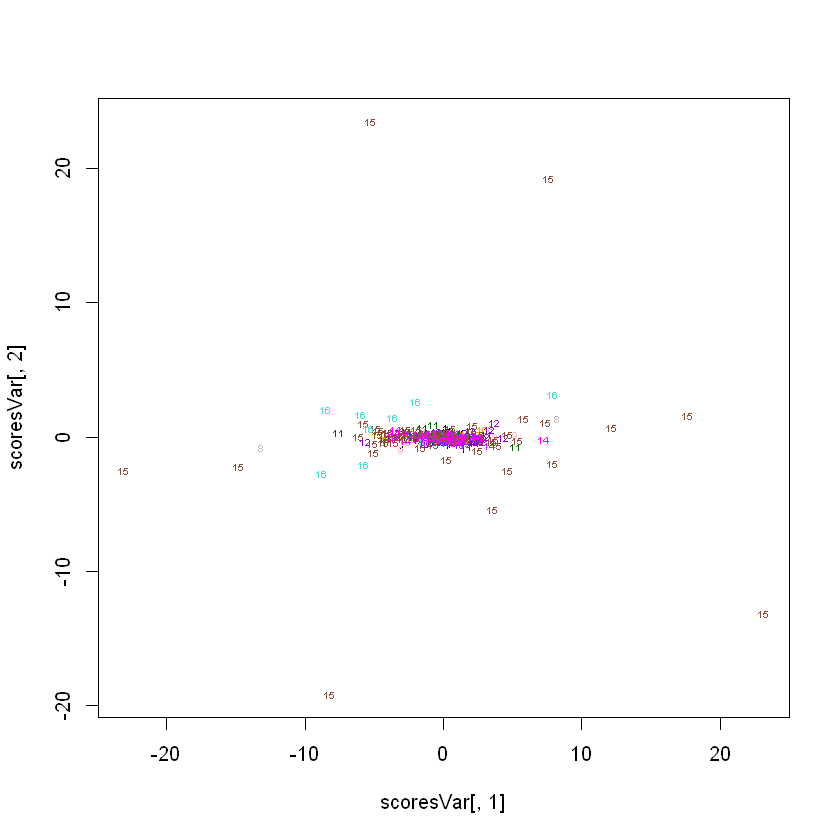

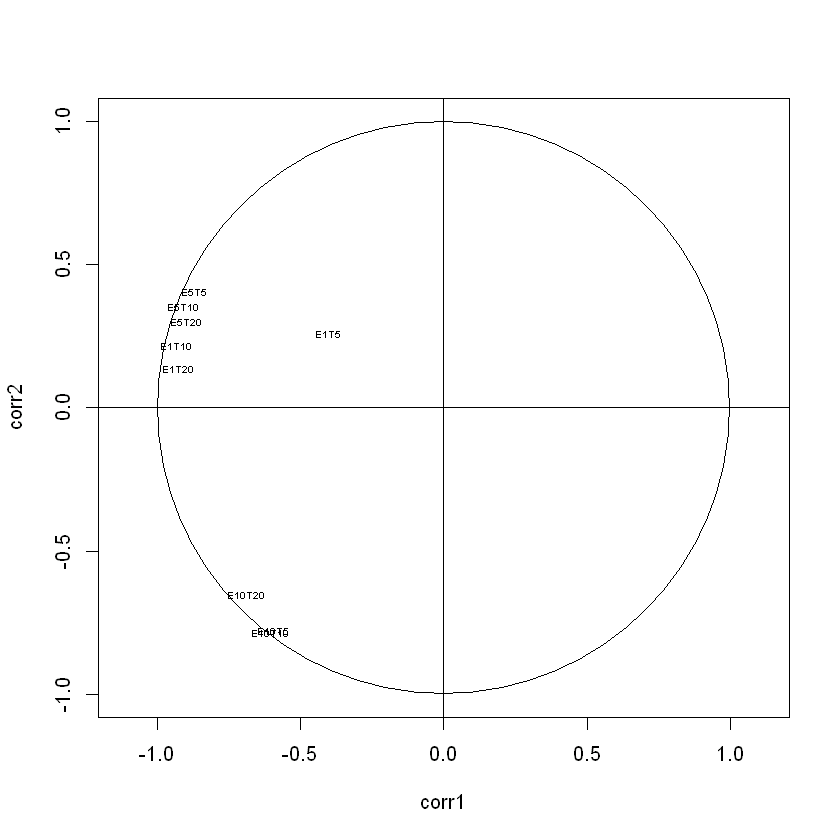

In [8]:
#Chargement des données
var = read.table("Databases/Incr.csv", sep= ";", header=TRUE, stringsAsFactors=F)

printAllGraph(var)

# Variations Relatives (Black)

- Deux premières composantes expliquent 88% du modèle.
- On observe toujours un "tas" global mais pas de segmentation apparente entre les années comme pour les données brutes.
- En revanche, sur le cercle des corrélations, les swaptions de même maturité sont regroupés dans les mêmes zones.

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.6653097 0.94474440 0.66543590 0.50231304 0.36641604
Proportion of Variance 0.7893195 0.09917133 0.04920055 0.02803538 0.01491786
Cumulative Proportion  0.7893195 0.88849087 0.93769142 0.96572679 0.98064465
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.24676290 0.223962734 0.201884601 0.149631231
Proportion of Variance 0.00676577 0.005573256 0.004528599 0.002487723
Cumulative Proportion  0.98741042 0.992983678 0.997512277 1.000000000


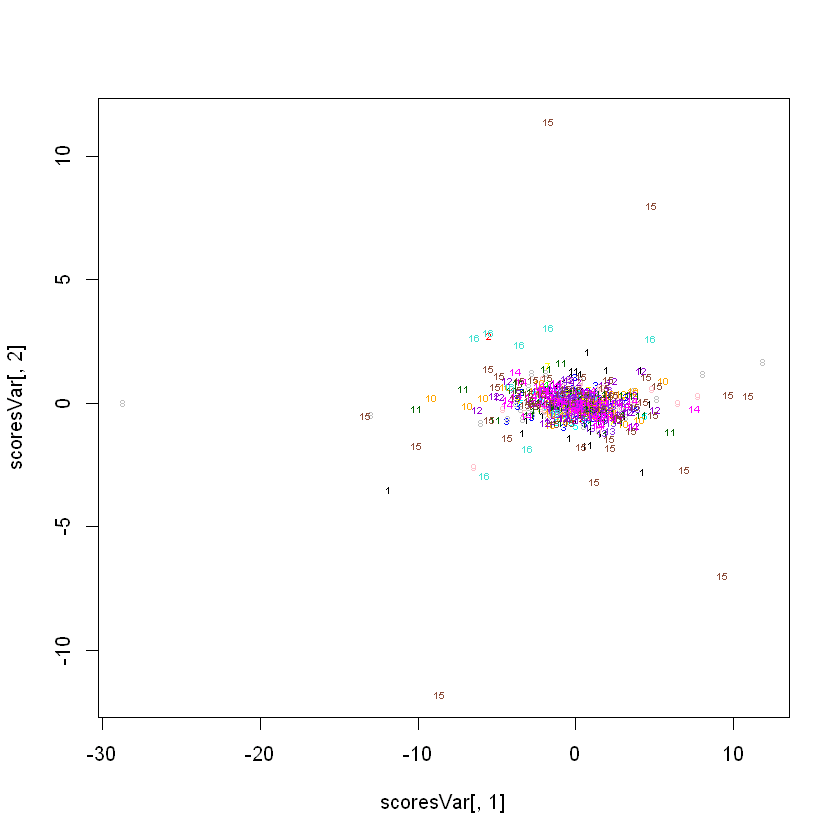

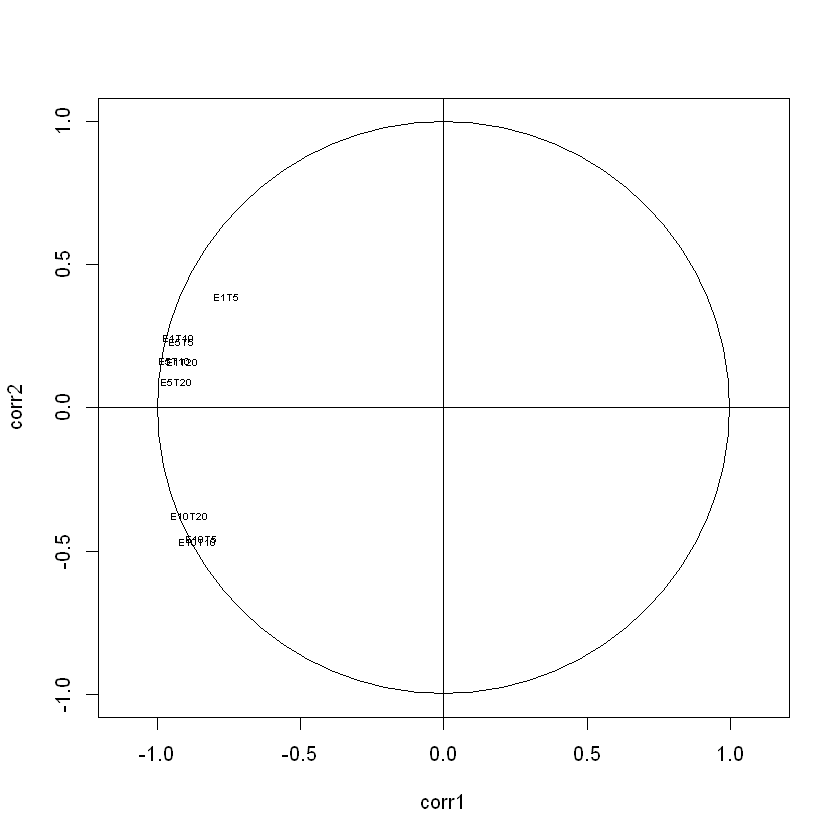

In [9]:
#Chargement des données
varRltv = read.table("Databases/var_relatives.csv", sep= ";", header=TRUE, stringsAsFactors=F)

printAllGraph(varRltv)

In [10]:
ATM['Date']

ERROR: Error in charToDate(x): character string is not in a standard unambiguous format


          Date
1   2001-01-11
2   2001-01-18
3   2001-01-25
4   2001-02-01
5   2001-02-08
6   2001-02-15
7   2001-02-22
8   2001-03-01
9   2001-03-08
10  2001-03-15
11  2001-03-22
12  2001-03-29
13  2001-04-05
14  2001-04-12
15  2001-05-10
16  2001-05-17
17  2001-05-24
18  2001-06-07
19  2001-06-14
20  2001-06-21
21  2001-06-28
22  2001-07-05
23  2001-07-12
24  2001-07-19
25  2001-07-26
26  2001-08-02
27  2001-08-16
28  2001-08-23
29  2001-08-30
30  2001-09-06
31  2001-09-13
32  2001-09-20
33  2001-09-27
34  2001-10-04
35  2001-10-11
36  2001-10-18
37  2001-10-25
38  2001-11-01
39  2001-11-08
40  2001-11-15
41  2001-11-22
42  2001-11-29
43  2001-12-06
44  2001-12-13
45  2001-12-20
46  2001-12-27
47  2002-01-03
48  2002-01-17
49  2002-01-24
50  2002-01-31
51  2002-02-07
52  2002-02-14
53  2002-02-21
54  2002-02-28
55  2002-03-07
56  2002-03-14
57  2002-03-21
58  2002-03-28
59  2002-04-04
60  2002-04-11
61  2002-10-24
62  2002-10-31
63  2002-11-07
64  2002-11-14
65  2002-11-21
66  2002-1

# Vol brutes (BLACK - De 2001 à Juin 2007)

- Coefficients de corrélations avec les deux premières composantes sont beaucoup plus différentes selon les types de produit car dispersion sur le cercle de corrélation, avant on avait plutot un tas...
- 97% du modèle expliqué avec les deux premières composantes principales.

Importance of components:
                          Comp.1    Comp.2     Comp.3      Comp.4      Comp.5
Standard deviation     2.7530763 1.1075461 0.33505066 0.187135145 0.145788316
Proportion of Variance 0.8421588 0.1362954 0.01247322 0.003891062 0.002361581
Cumulative Proportion  0.8421588 0.9784541 0.99092736 0.994818427 0.997180009
                           Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.12022218 0.0698998839 0.0616541369 0.0473214875
Proportion of Variance 0.00160593 0.0005428882 0.0004223592 0.0002488137
Cumulative Proportion  0.99878594 0.9993288271 0.9997511863 1.0000000000


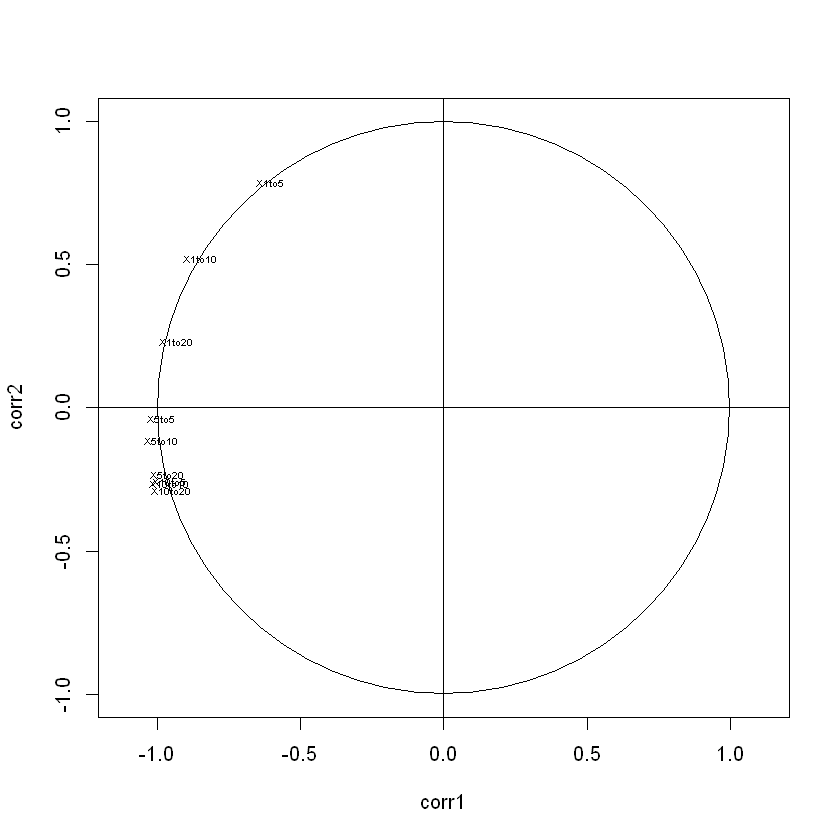

In [11]:
ATMPart1 = ATM[1:285,]

printAllGraph(ATMPart1, factorialPlan = FALSE)

# Vol brutes (BLACK - De Juin 2007 à Juin 2014 puis de Juin 2014 à 2016)

- Plus tassé sur le cercle de corrélation que précédemment, mais, inerties de tous les types de produits sont bien expliquées par 2 premières composantes principales.

Importance of components:
                          Comp.1     Comp.2    Comp.3      Comp.4       Comp.5
Standard deviation     2.9206411 0.57815963 0.3140529 0.150314334 0.0791326555
Proportion of Variance 0.9477938 0.03714095 0.0109588 0.002510489 0.0006957752
Cumulative Proportion  0.9477938 0.98493476 0.9958936 0.998404045 0.9990998199
                             Comp.6       Comp.7      Comp.8       Comp.9
Standard deviation     0.0554718347 0.0501466671 0.042194020 0.0270087485
Proportion of Variance 0.0003419027 0.0002794098 0.000197815 0.0000810525
Cumulative Proportion  0.9994417227 0.9997211325 0.999918948 1.0000000000


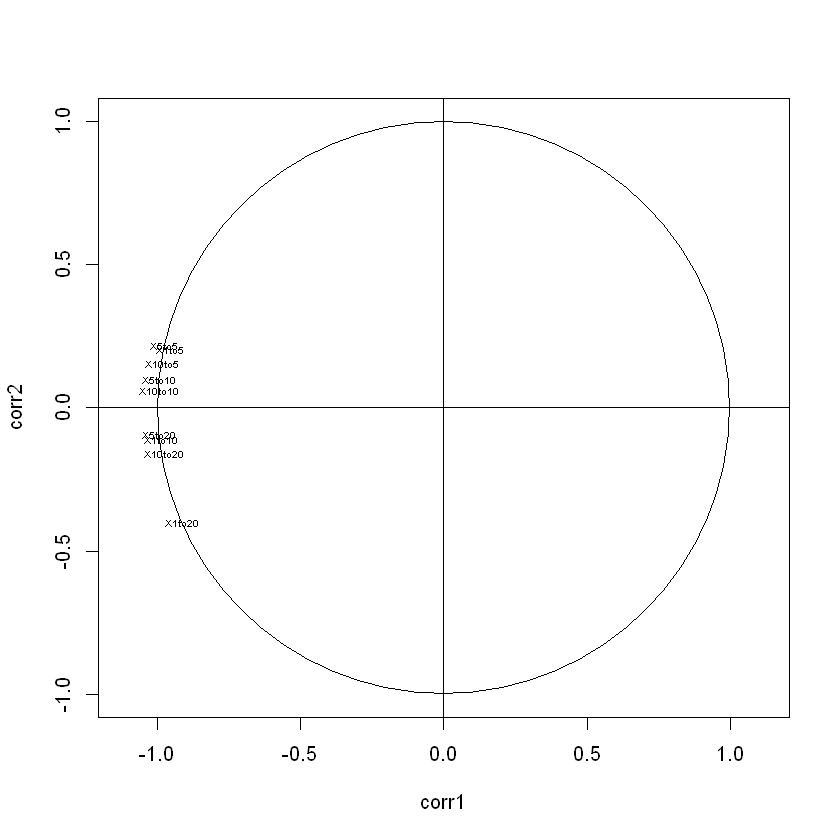

In [12]:
printAllGraph(ATM[286:650,], factorialPlan = FALSE)

Importance of components:
                          Comp.1     Comp.2    Comp.3      Comp.4     Comp.5
Standard deviation     2.8174276 0.83683611 0.4669662 0.298987120 0.19753719
Proportion of Variance 0.8819887 0.07781052 0.0242286 0.009932589 0.00433566
Cumulative Proportion  0.8819887 0.95979921 0.9840278 0.993960402 0.99829606
                            Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.108454712 0.0440136521 0.0315842126 2.526367e-02
Proportion of Variance 0.001306936 0.0002152446 0.0001108403 7.091702e-05
Cumulative Proportion  0.999602998 0.9998182427 0.9999290830 1.000000e+00


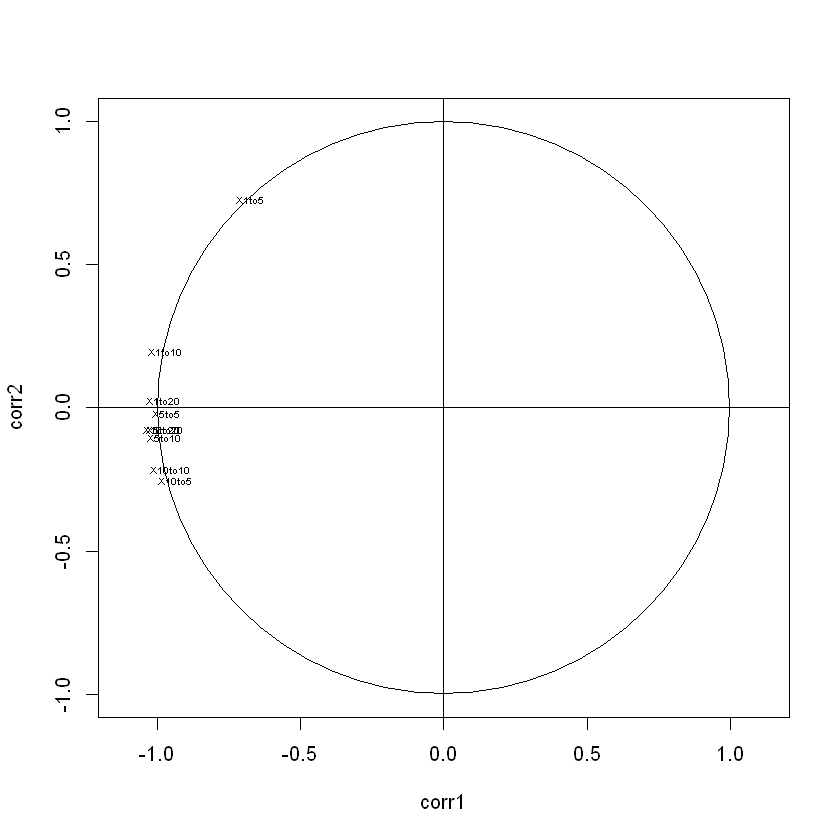

In [13]:
printAllGraph(ATM[651:nrow(ATM),], factorialPlan = FALSE)

# Variations brutes et relatives (BLACK sur les 3 sous-périodes)

Les 3 sous périodes sont en terme de numéro de date : 
- 1:285
- 286:650
- 651:nrow()

Pour les variations relatives, difficultés à tirer plus de conclusion que ce étudié sur la période entière. 
Idem pour les incréments absolus.

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.8255560 0.70517765 0.47338564 0.37784633 0.242085926
Proportion of Variance 0.8870852 0.05525284 0.02489933 0.01586309 0.006511733
Cumulative Proportion  0.8870852 0.94233801 0.96723734 0.98310044 0.989612169
                            Comp.6     Comp.7      Comp.8      Comp.9
Standard deviation     0.180542158 0.17310311 0.141495437 0.104447884
Proportion of Variance 0.003621719 0.00332941 0.002224551 0.001212151
Cumulative Proportion  0.993233888 0.99656330 0.998787849 1.000000000


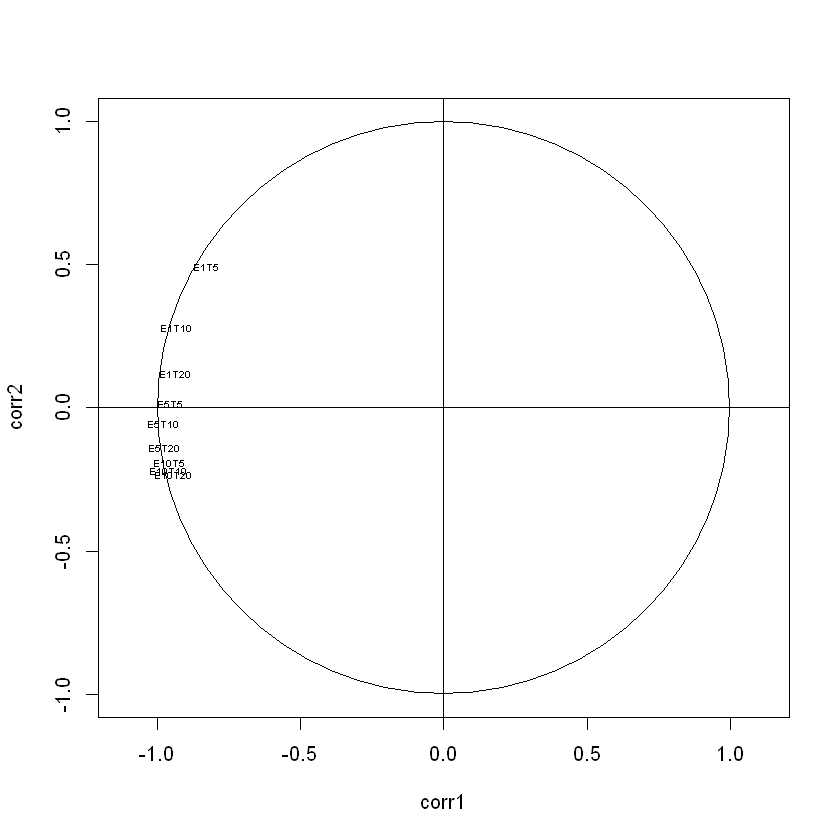

In [14]:
printAllGraph(var[286:650,], factorialPlan = FALSE)

# Données Normales (Modèle Bachelier)

Les trois sous périodes s'étendent en terme de numéro de dates : 
- 1:255
- 256:621
- 622:nrow()

In [15]:
ATMBach = read.table("Databases/swaphistBachelier.csv", sep= ";", header=TRUE, stringsAsFactors=F)
varBach = read.table("Databases/IncrBachelier.csv", sep= ";", header=TRUE, stringsAsFactors=F)
varRltvBach = read.table("Databases/var_relativesBachelier.csv", sep= ";", header=TRUE, stringsAsFactors=F)

Importance of components:
                          Comp.1    Comp.2     Comp.3      Comp.4      Comp.5
Standard deviation     2.6595979 1.2229823 0.54155901 0.261574675 0.218886434
Proportion of Variance 0.7859401 0.1661873 0.03258735 0.007602368 0.005323475
Cumulative Proportion  0.7859401 0.9521274 0.98471477 0.992317138 0.997640612
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.0906639410 0.0782449712 0.0695207791 0.0453775862
Proportion of Variance 0.0009133278 0.0006802528 0.0005370154 0.0002287917
Cumulative Proportion  0.9985539400 0.9992341929 0.9997712083 1.0000000000


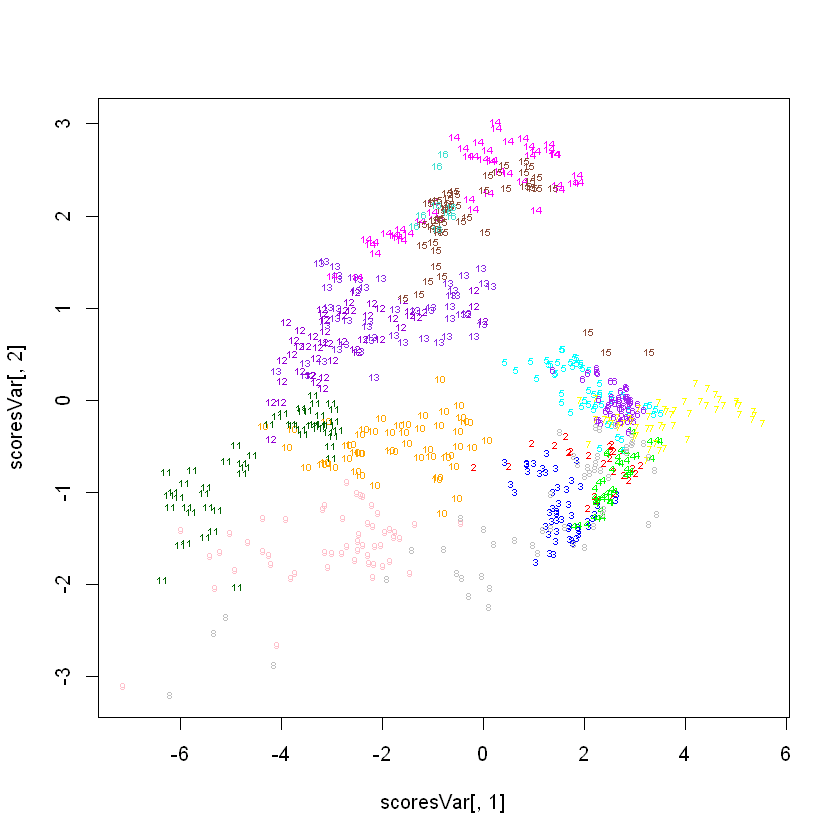

Importance of components:
                         Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.549945 1.1408106 0.7105004 0.53383111 0.40555690
Proportion of Variance 0.722469 0.1446054 0.0560901 0.03166396 0.01827516
Cumulative Proportion  0.722469 0.8670744 0.9231645 0.95482850 0.97310365
                            Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.290195718 0.271826739 0.215584530 0.193615862
Proportion of Variance 0.009357062 0.008209975 0.005164077 0.004165234
Cumulative Proportion  0.982460715 0.990670690 0.995834766 1.000000000


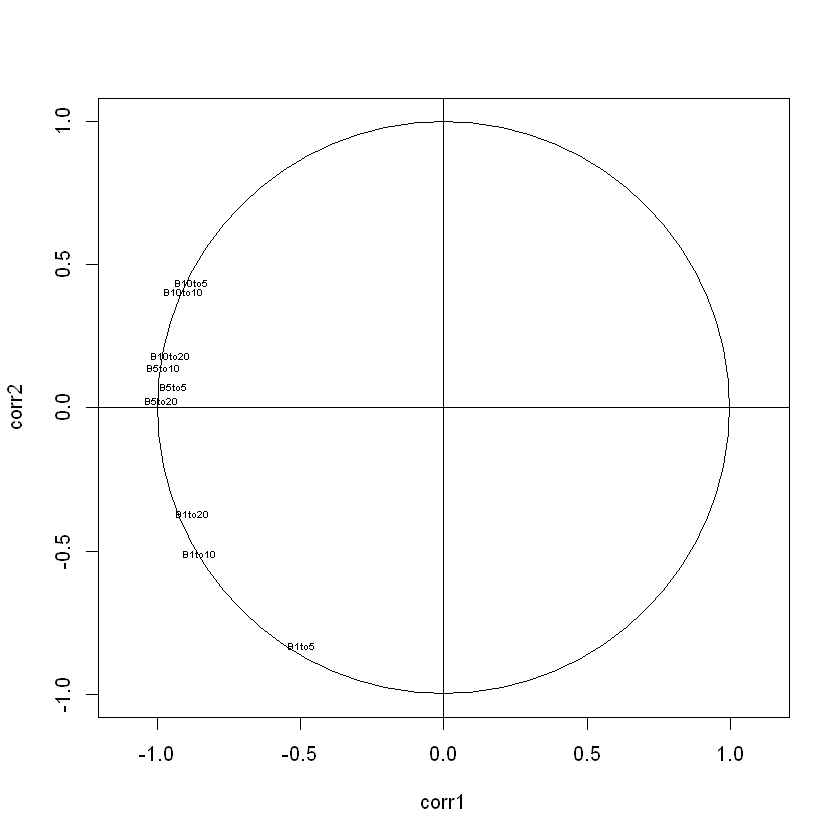

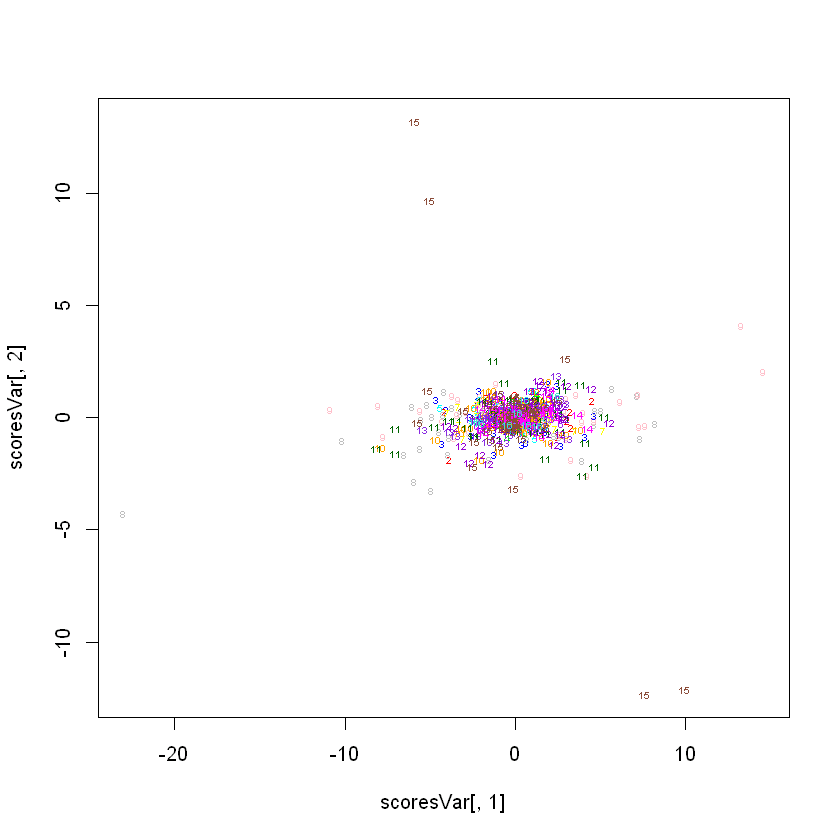

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.5138439 1.1686094 0.74464186 0.56606427 0.42108103
Proportion of Variance 0.7021568 0.1517387 0.06161017 0.03560319 0.01970103
Cumulative Proportion  0.7021568 0.8538954 0.91550559 0.95110879 0.97080981
                            Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.299670847 0.282178878 0.227990490 0.203235058
Proportion of Variance 0.009978068 0.008847213 0.005775518 0.004589388
Cumulative Proportion  0.980787881 0.989635094 0.995410612 1.000000000


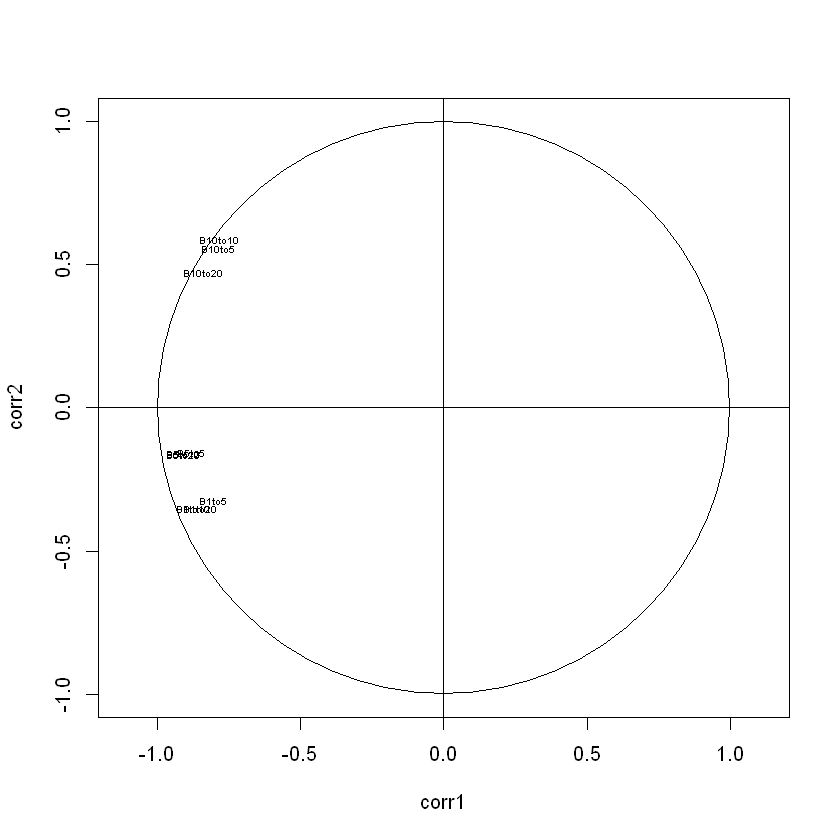

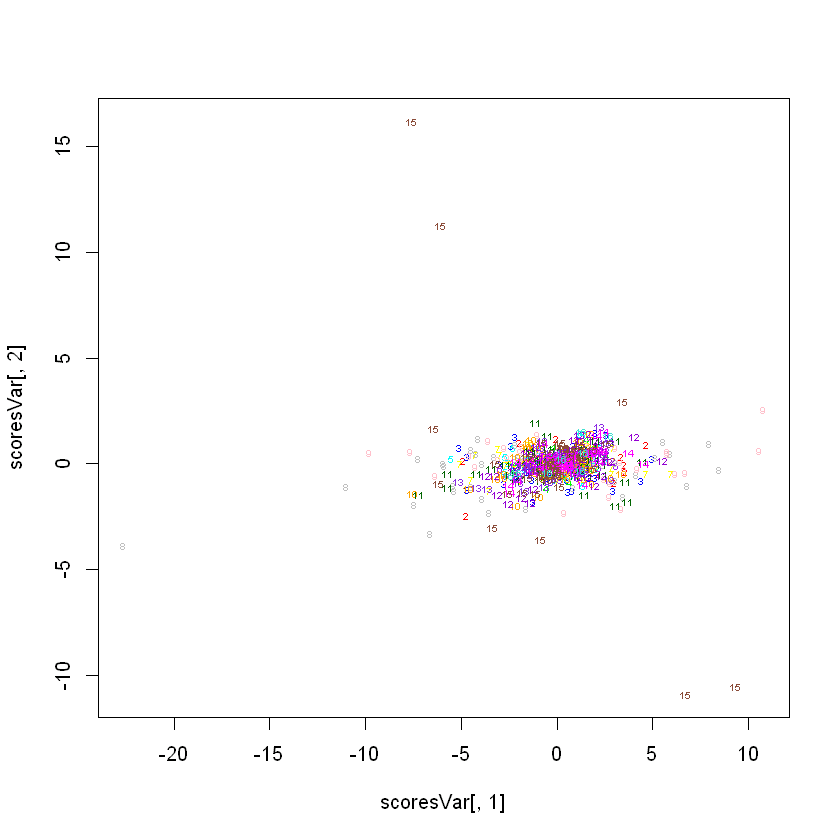

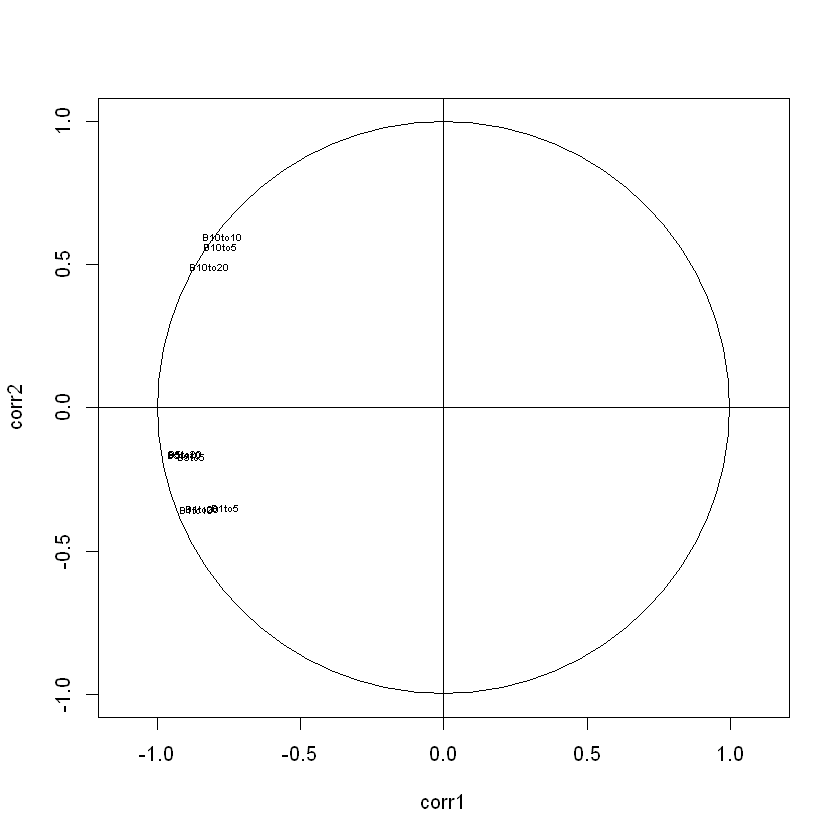

In [16]:
printAllGraph(ATMBach)
printAllGraph(varBach)
printAllGraph(varRltvBach)